#### Import

In [1]:
from analysis_functions import statistic as s, pre_processing
import numpy as np
import pandas as pd

#### Get preprocessed data

In [2]:
preprocessed_data = pre_processing.pre_process()

n_actions_in_5min = preprocessed_data.get('n_actions_in_5min')
n_replied = preprocessed_data.get('n_replied')
n_replied_full = preprocessed_data.get('n_replied_full')
users_replies = preprocessed_data.get('users_replies')

Load preprocessed data from JSON files...
Data loaded successfully!


---
### Average number of actions in 5 minutes of interface (for each system)

#### Action list:
- event created
- event updated
- event deleted
- todo created
- todo updated
- message replied

#### Calculated as the **mean** of the number of actions in the list above

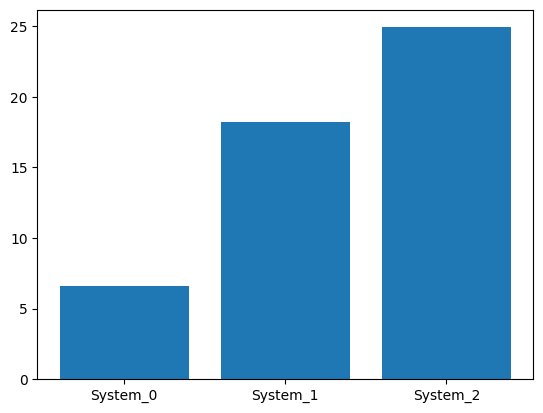

,mean,stddev
System_0,6.597403,4.478693
System_1,18.220779,9.377541
System_2,24.921053,8.089570


In [3]:
stddev_actions = {c : np.std(n_actions_in_5min[c]) for c in range(3)}
s.n_action_in_interface(n_actions=n_actions_in_5min, stddev_actions=stddev_actions, plot=True)

### Average number of answered messages (normalized to [0,1]) for each system
- Calculated as the **mean** of ${\Huge\frac{\text{number of messages replied}}{\text{number of received messages}}}$

<br>

#### NB: The denominator contains <u>only the number of messages arrived</u>, and <u>does NOT consider</u> the followups that would have arrived if the user had responded

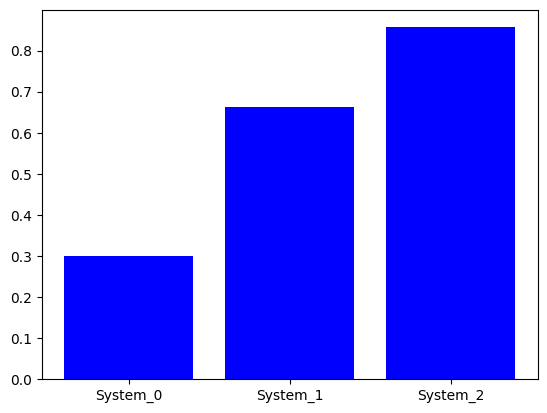

,mean (stddev)
0,0.2997 (0.2079)
1,0.6625 (0.3134)
2,0.8567 (0.2465)


In [4]:
s.avg_message_replied(replies=n_replied, plot=True)

### Average number of answered messages (normalized to [0,1]) for each system, considering both: 
#### 1. The number of messages arrived
#### 2. The number of followups that would have come if the user responded to the messages

<br>

- Calculated as the **mean** of ${\Huge\frac{\text{number of messages replied}}{\text{number of received messages } + \text{ number of followups of messages received}}}$

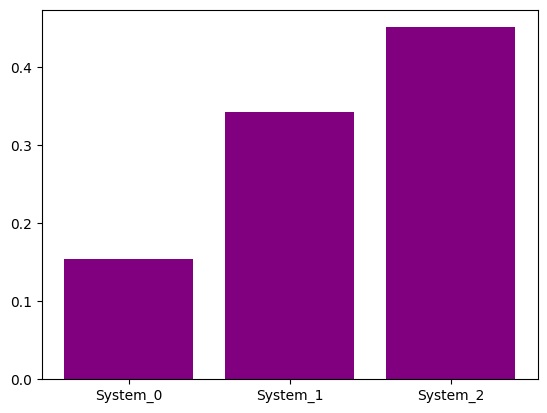

,mean (stddev)
0,0.1538 (0.1074)
1,0.3423 (0.1643)
2,0.4506 (0.1398)


In [5]:
s.avg_message_replied(replies=n_replied_full, plot=True, color='purple')

### Total message replied for System 0, 1, 2

In [6]:
for system in range(3):
    print(f"- Total message replied for System {system} = {sum(users_replies[system])}")

- Total message replied for System 0 = 230
- Total message replied for System 1 = 668
- Total message replied for System 2 = 929


---
## Precision and Recall

In [7]:
n_systems = 3
data = dict()

# For each system (0,1,2) read data and compute 'precision' and 'recall'
for system in range(n_systems):
    df = pd.read_csv(f'./data/precision_recall_data/pr_rec_sys{system}.csv')    
    df['precision'] = df.apply(lambda row: s.precision(row), axis=1)
    df['recall'] = df.apply(lambda row: s.recall(row), axis=1)
    
    print(f'''
    *** System {system} ***
    - Precision = {df['precision'].mean()}
    - Recall = {df['recall'].mean()}
    ''')
    data[system] = df


    *** System 0 ***
    - Precision = 0.6461657390228818
    - Recall = 0.13942293778800152
    

    *** System 1 ***
    - Precision = 0.8469378925547756
    - Recall = 0.5057748500633789
    

    *** System 2 ***
    - Precision = 0.8219760320089268
    - Recall = 0.6307785867383391
    


---

## Statistical test (Kruskal-Wallis) on Precision and Recall

In [67]:
from scipy.stats import kruskal

dfs = [pd.read_csv(f'./data/precision_recall_data/pr_rec_sys{i}.csv') for i in range(3)]

for df in dfs:
    df['precision'] = df.apply(lambda row: s.precision(row), axis=1)
    df['recall'] = df.apply(lambda row: s.recall(row), axis=1)

_, k_precision = kruskal(dfs[0]['precision'], dfs[1]['precision'], dfs[2]['precision'])
_, k_recall = kruskal(dfs[0]['recall'], dfs[1]['recall'], dfs[2]['recall'])

print(f'Kruskal-Wallis - Precision p_value = {s.format_p_values(k_precision, n_hypotheses=2)}')
print(f'Kruskal-Wallis - Recall p_value = {s.format_p_values(k_recall, n_hypotheses=2)}')

Kruskal-Wallis - Precision p_value = 0.043040275 (*)
Kruskal-Wallis - Recall p_value = 0.000000000 (***)
